In [108]:
from PIL import Image
import numpy as np
from PIL import ImageOps, ImageChops
import matplotlib.pyplot as plt
from PIL import ImageStat as stat

# Tryby obrazów

(300, 380)
RGBA


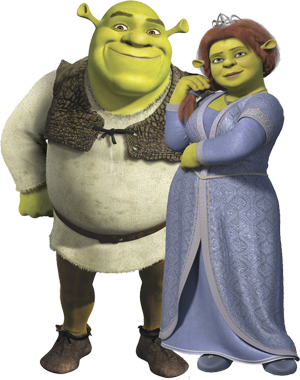

In [109]:
shrek = Image.open("Shrek_Fiona.png")
print(shrek.size)
print(shrek.mode)
shrek

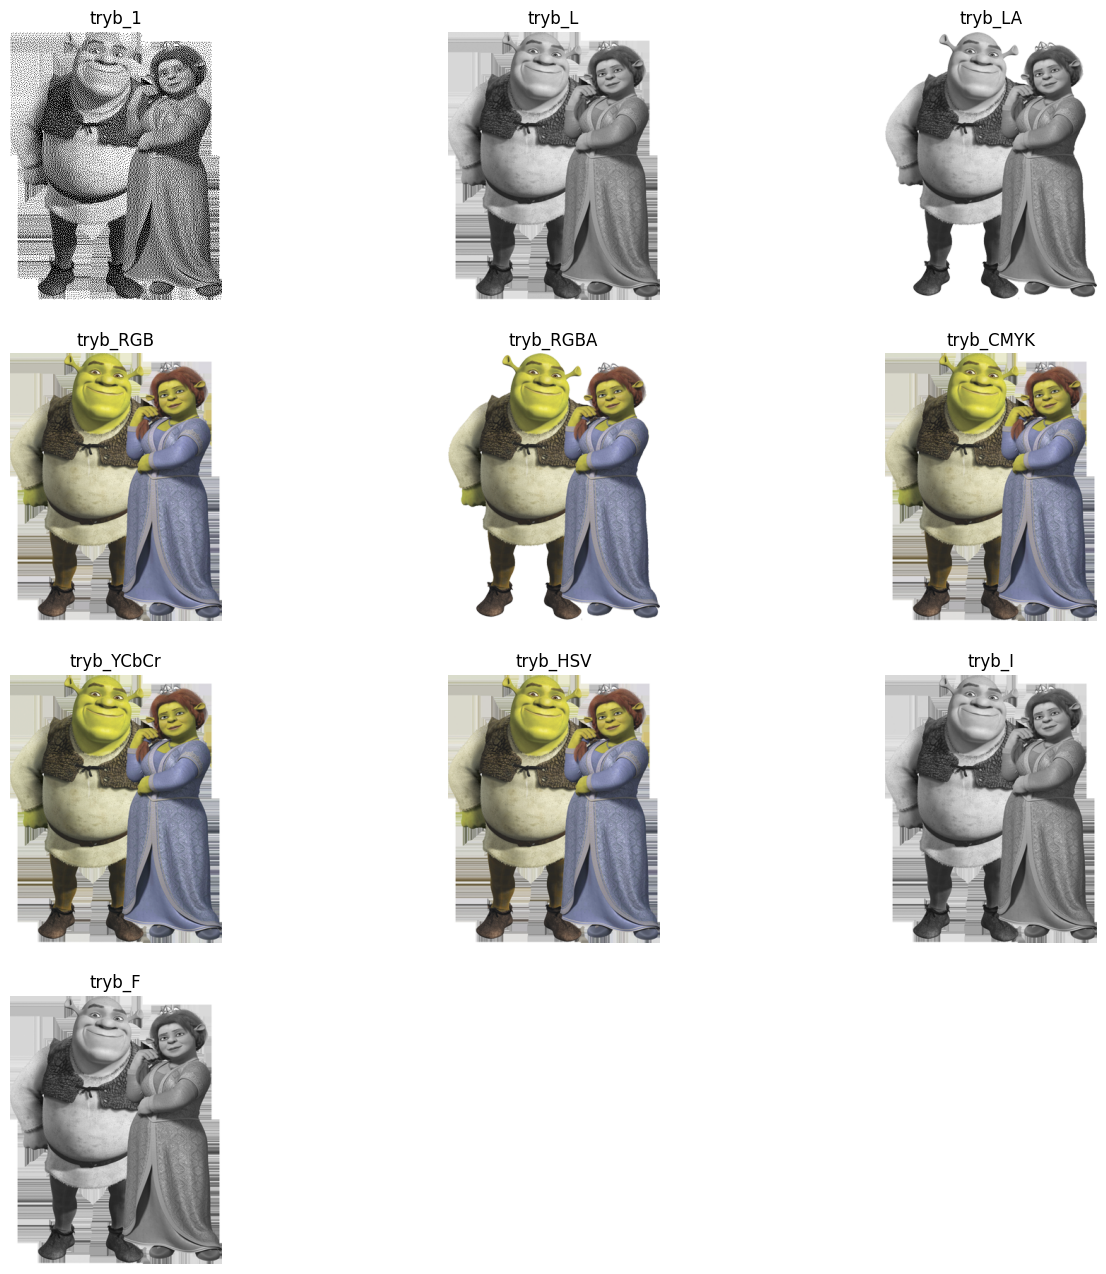

In [110]:
tryby = ['1', 'L', 'LA',  'RGB','RGBA','CMYK','YCbCr','HSV',"I",'F']
plt.figure(figsize=(16, 16))
i=1
for t in tryby:
    file_name = "tryb_"+ str(t)
    im_c = shrek.convert(t)
    plt.subplot(4, 3, i)
    plt.title(str(file_name))
    plt.imshow(im_c, "gray")
    plt.axis('off')
    i +=1


# tryb CMYK

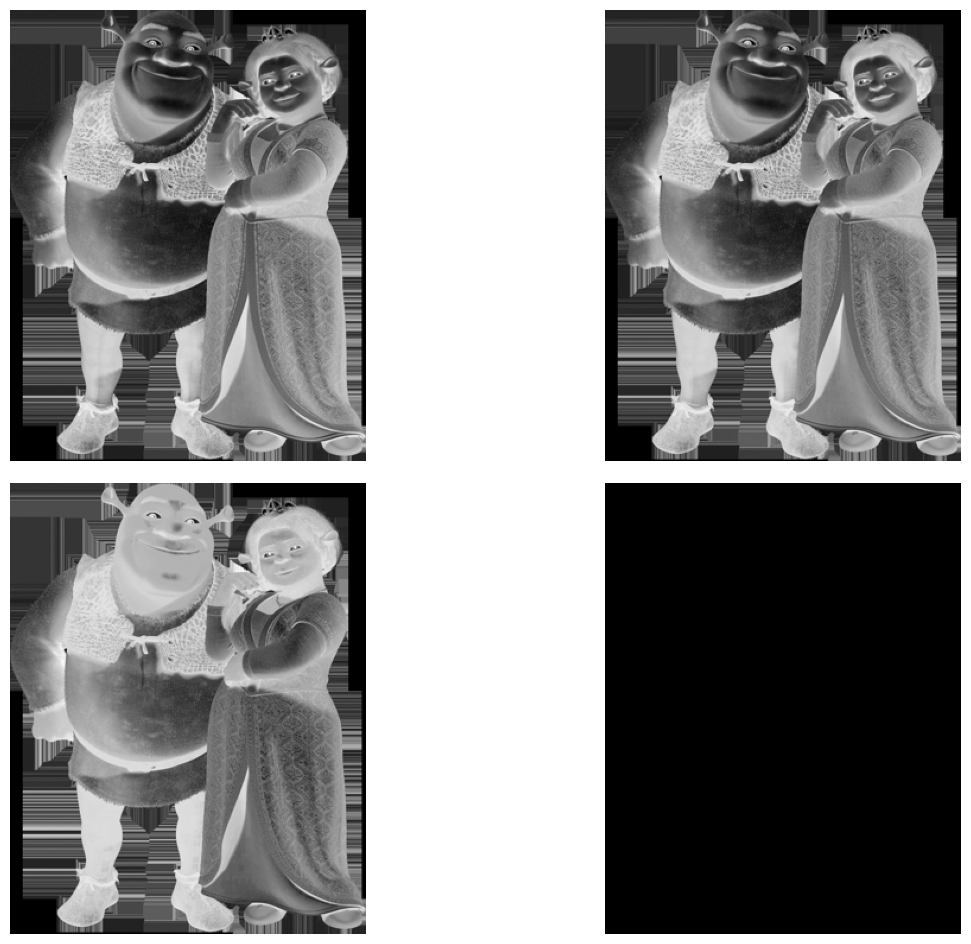

In [111]:
tryb_CMYK = shrek.convert("CMYK")
c, m, y, k = tryb_CMYK.split()

list = [c, m, y, k]
i = 1
plt.figure(figsize=(15, 12))
for item in list:
    plt.subplot(2, 2, i)
    plt.imshow(item, 'gray')
    plt.axis('off')
    i += 1
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

# tryb YCbCr

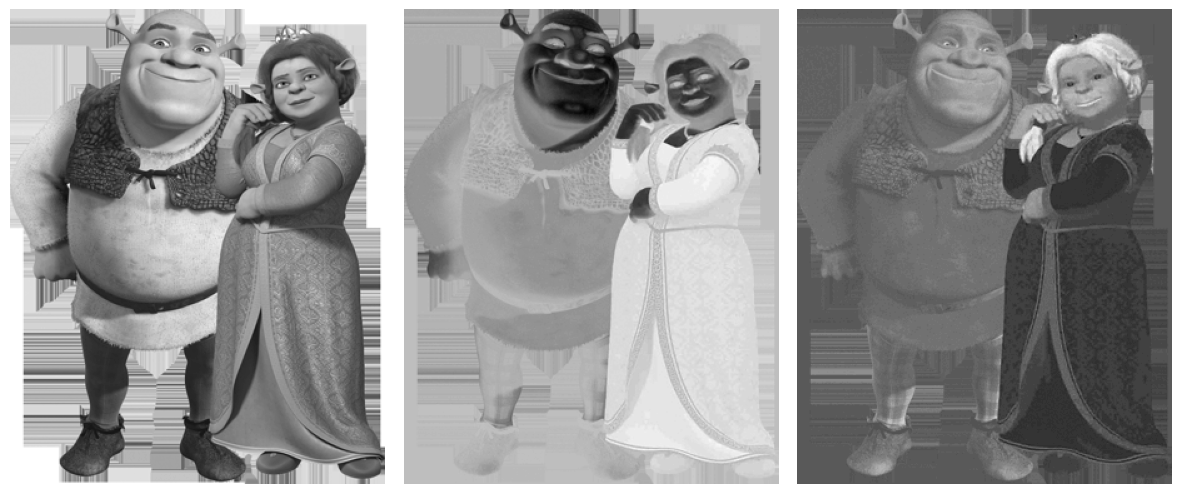

In [112]:
tryb_YCbCr = shrek.convert("YCbCr")
Y, Cb, Cr = tryb_YCbCr.split()

list = [Y, Cb, Cr]
i = 1
plt.figure(figsize=(15, 12))
for item in list:
    plt.subplot(1, 3, i)
    plt.imshow(item, 'gray')
    plt.axis('off')
    i += 1
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

# tryb RGBA

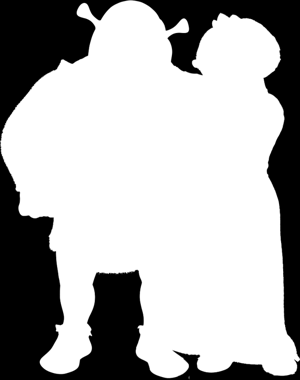

In [113]:
r,g,b,a = shrek.split()
a




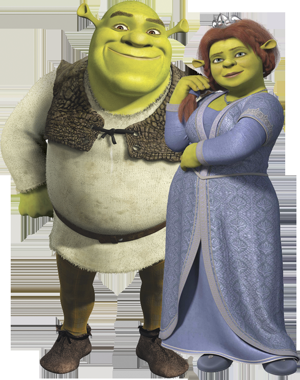

In [114]:
im1 = Image.merge('RGB', (r,g,b))
im1


In [115]:
im2 = shrek.convert('RGB')                
diff = ImageChops.difference(im1, im2)
s = stat.Stat(diff)
print(s.extrema)

[(0, 0), (0, 0), (0, 0)]


paste z maską - wykorzystanie do własnej konwersji na RGB

tryb obrazu:  RGB


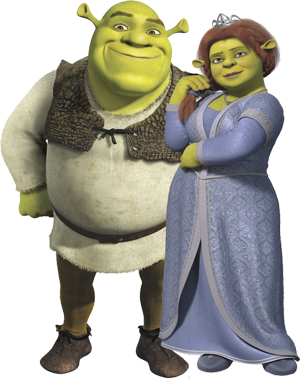

In [116]:
shrek_RGB = Image.new('RGB', shrek.size, (255,255,255)) # nowy obraz wypełniony na biało
shrek_RGB.paste(shrek, (0, 0), a)
print('tryb obrazu: ', shrek_RGB.mode)
shrek_RGB

im.putalpha(im1)   - dodaje lub zastępuje kanal alfa, im1 jest obrazem w trybie 1 lub L

RGBA


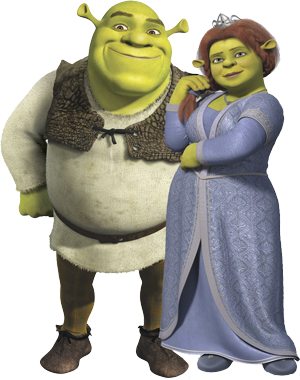

In [117]:
shrek_RGB1 = shrek_RGB.copy()
shrek_RGB1.putalpha(a)
print(shrek_RGB1.mode)
shrek_RGB1

(300, 380) (800, 600)
(300, 380) (300, 380)


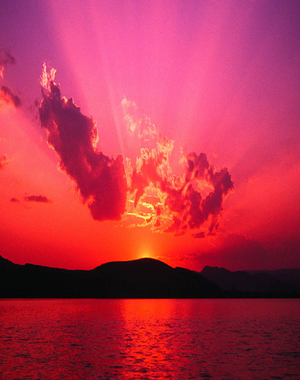

In [118]:
tlo = Image.open('tlo.png')
print(shrek.size, tlo.size)
tlo = tlo.resize(shrek.size, 1)
print(shrek.size, tlo.size)
tlo

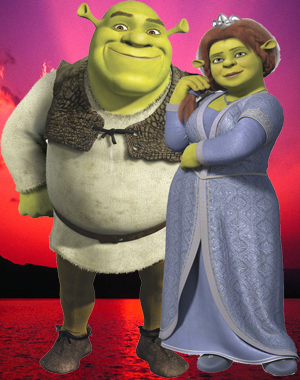

In [119]:
tlo1 = tlo.copy()
tlo1.paste(shrek, (0, 0), a) #shrek wklejony w tlo1 z maska a (kanał alpha obrazu shrek)
tlo1

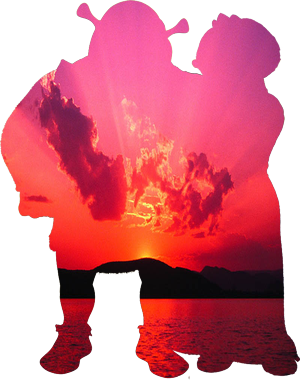

In [120]:
shrek1 = shrek.copy()
shrek1.paste(tlo, (0, 0), a) #  tlo wklejone w shrek1  z maska a
shrek1

tryb motyla RGBA
(1331, 1876)
(300, 380)


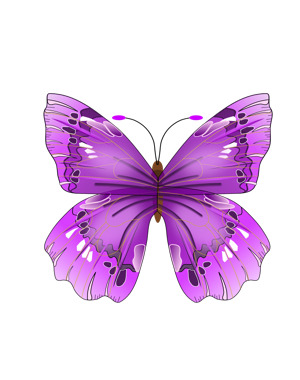

In [121]:
motyl = Image.open('motyl.png')
print("tryb motyla", motyl.mode)
print(motyl.size)
motyl1 = motyl.resize(shrek.size)
print(motyl1.size)
motyl1

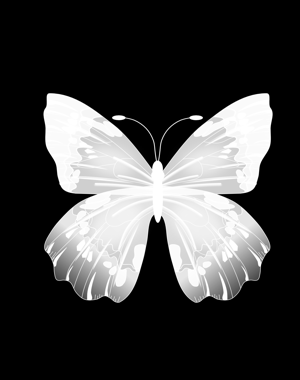

In [122]:
shrek_RGB2 = shrek_RGB.copy()
rm,gm,bm,am = motyl1.split()
am

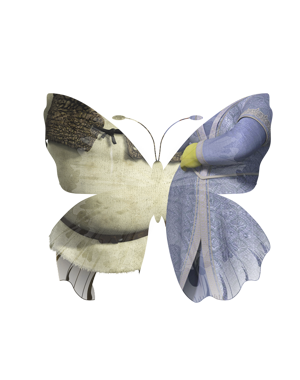

In [123]:
shrek_RGB2 = shrek_RGB.copy()
shrek_RGB2.putalpha(am)

shrek_RGB2

In [124]:
am_neg = ImageOps.invert(am)

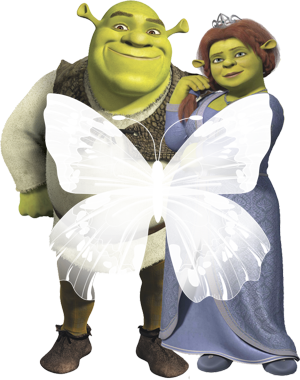

In [125]:
shrek_RGB3 = shrek_RGB.copy()
shrek_RGB3.putalpha(am_neg)
shrek_RGB3

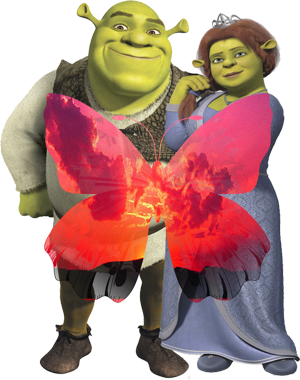

In [126]:
shrek_RGB4 = shrek_RGB.copy()
shrek_RGB4.paste(tlo, (0, 0), motyl1)
shrek_RGB4

kompozycje z maską - Image.composite(im1, im2, maska)
równoważne im2.paste(im1, (0,0), maska)

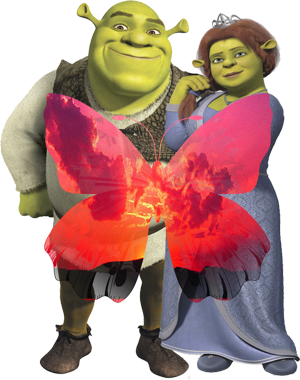

In [127]:
shrek_RGB5 = shrek_RGB.copy()
comp = Image.composite(tlo, shrek_RGB5, am) 
comp

# metoda blend -----mieszanie obrazów
mix = Image.blend(im1, im2, alpha = 0.3) # im1 * (1- alpha ) + im2 * alpha

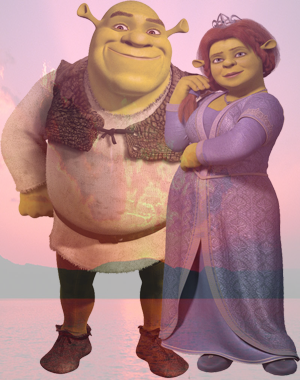

In [128]:
mix = Image.blend(shrek_RGB5, tlo, alpha = 0.3) 
mix


# Mieszanie obrazów. Przykład 2.

In [129]:
im_M = Image.open('messi.jpg')
im_p = Image.open('zlota_pilka.png')

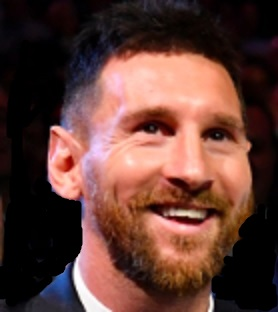

In [130]:
im_M

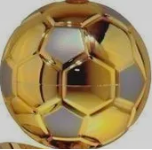

In [131]:
im_p

In [132]:
im1 = im_M.copy()
im2 = im_p.copy()
w1, h1 = im1.size
w2, h2 = im2.size

print("Messi", w1, h1)
print("puchar", w2, h2)
W = min(w1, w2)
H = min(h1, h2)
print(W, H)

Messi 278 312
puchar 152 150
152 150


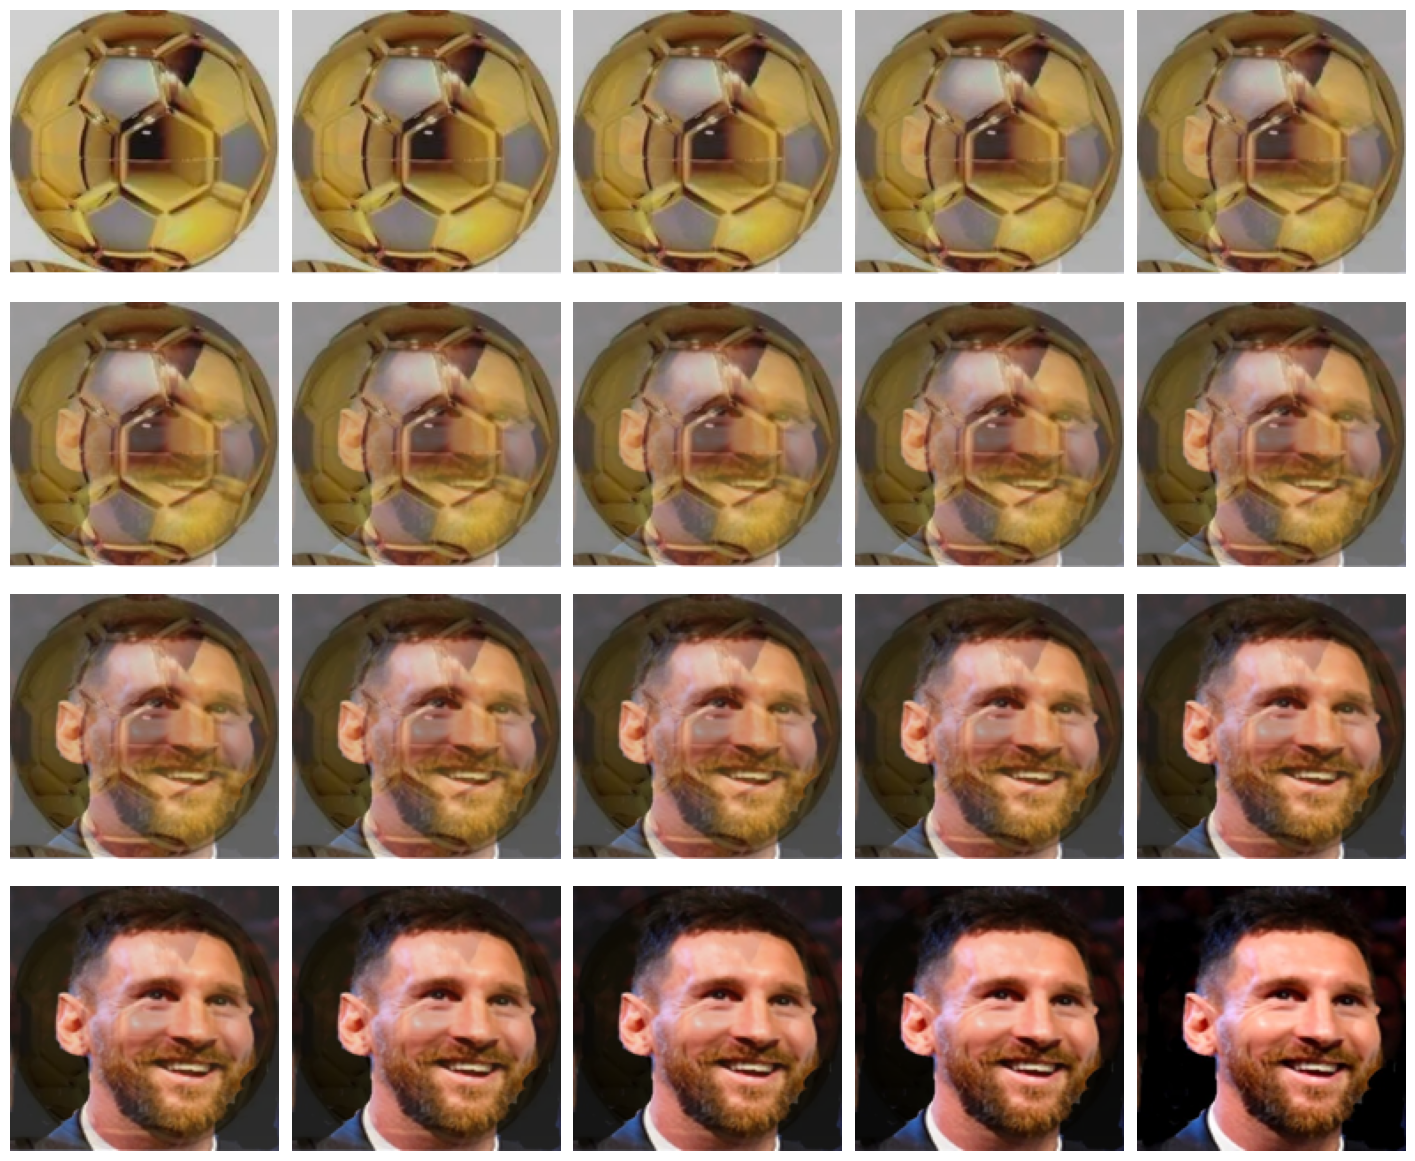

In [133]:
im_1 = im1.resize((W, H), 1)  
im_2 = im2.resize((W, H), 1)

i = 1
plt.figure(figsize=(18,15))
for alfa in np.linspace(0,1,20):
    plt.subplot(4,5,i)
    mix = Image.blend(im_2, im_1, alpha=alfa)
    plt.imshow(mix)
    plt.axis('off')
    i += 1
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()